#### Navigate to folder containing .mat files. used in this notebook: NPR-075.b11.mat

In [1]:
cd ../_data/matlabData

/home/gustav/Documents/DD142X/code/_data/matlabData


#### Imports and function definitions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from h5py import File
def getMatlabValues(fileName):
    with File(fileName, "r") as data:
        return {
            key: np.array(data[key]["values"]).flatten() for key in data.keys()
        }

# Fourier Feature Vector
def ffv(xs, Fs = 16000., epoch_size = 2 ** 11, fft_n = 2 ** 14):

    # Pad with zeroes for more frequency outputs
    # Compare np.fft.fftfreq(n, 1/16000) for n = 2**11, 2**14
    fft_in = np.zeros((xs.shape[0], fft_n))
    fft_in[ : , 0:epoch_size] = xs

    frqs = np.fft.fftfreq(fft_n, 1./Fs)
    lo = np.where(frqs > 12)[0][0]
    hi = np.where(frqs > 30)[0][0]
    fftxs = np.abs(np.fft.fft(fft_in)[:,lo:hi])

    return fftxs, frqs[lo:hi]

In [3]:
mldict = getMatlabValues("NPR-075.b11.mat")

#### Read all str, gp channels

In [4]:
str_lfp = np.array([ v for k, v in mldict.items() if "str_lfp" in k ])
gp_lfp  = np.array([ v for k, v in mldict.items() if "gp_lfp"  in k ])
all_lfp = np.concatenate((str_lfp, gp_lfp), axis = 0)

#### Trim to size - channel lengths should be epoch size * epochs

In [5]:
epoch_n = 2 ** 11
Fs = 16000
epochs_n = int(str_lfp.shape[1] / epoch_n)

# epoch_n and epochs_n, admittedly, somewhat confusing
# epoch_n : n points in an epoch
# epochs_n : amount of epochs

str_lfp = str_lfp[ : , 0 : epoch_n * epochs_n]
gp_lfp  = gp_lfp [ : , 0 : epoch_n * epochs_n]
all_lfp = all_lfp[ : , 0 : epoch_n * epochs_n]

#### Reshape to epoch-rows

In [6]:
str_lfp = str_lfp.reshape((-1, epoch_n))
gp_lfp  =  gp_lfp.reshape((-1, epoch_n))
all_lfp = all_lfp.reshape((-1, epoch_n))

#### If curious, amount of samples in total

In [7]:
print(str_lfp.shape)
print(gp_lfp.shape)
print(all_lfp.shape)

(8525, 2048)
(11625, 2048)
(20150, 2048)


In [8]:
from sklearn.manifold import TSNE

#### Generate feature vectors

In [9]:
ffv_str, _ = ffv(str_lfp)
ffv_gp , _ = ffv(gp_lfp )
ffv_all, _ = ffv(all_lfp)
n_features = ffv_str.shape[1]

#### Generate TSNE embeddings

In [10]:
tsne_str = TSNE().fit_transform(ffv_str.copy())
print(ffv_str.shape)
print(tsne_str.shape)

tsne_gp  = TSNE().fit_transform( ffv_gp.copy())
print(ffv_gp.shape)
print(tsne_gp.shape)

tsne_all = TSNE().fit_transform(ffv_all.copy())
print(ffv_all.shape)
print(tsne_all.shape)

(8525, 18)
(8525, 2)
(11625, 18)
(11625, 2)
(20150, 18)
(20150, 2)


#### Convert to 3-dim tensors
channels_n x epochs_n * 2
(2-component TSNE)

In [11]:
tsne_str = tsne_str.reshape((-1, epochs_n, 2))
tsne_gp  =  tsne_gp.reshape((-1, epochs_n, 2))
tsne_all = tsne_all.reshape((-1, epochs_n, 2))

print(tsne_str.shape)
print(tsne_gp.shape)
print(tsne_all.shape)

(11, 775, 2)
(15, 775, 2)
(26, 775, 2)


#### Mean, standard deviation over channels
Results in mean and standard deviation for feature vectors for each epoch

In [12]:
mean_str = tsne_str.mean(axis = 0)
std_str = tsne_str.std(axis = 0)
mean_gp  = tsne_gp.mean(axis = 0)
std_gp  = tsne_gp.std(axis = 0)
mean_all = tsne_all.mean(axis = 0)
std_all = tsne_all.std(axis = 0)

#### Example plot usage: Generates A LOT of plots
Generates mean (with ellipse showing st. dev.) for each epoch, per epoch

<Figure size 432x288 with 0 Axes>

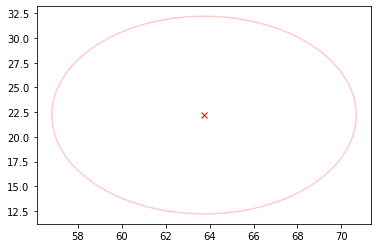

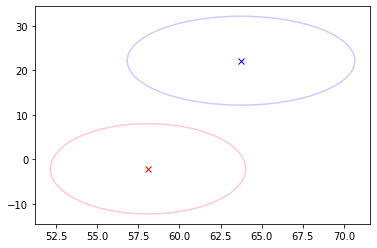

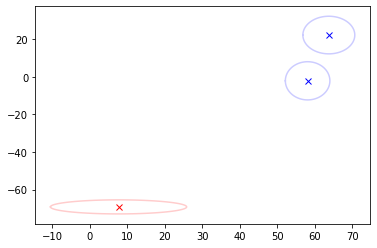

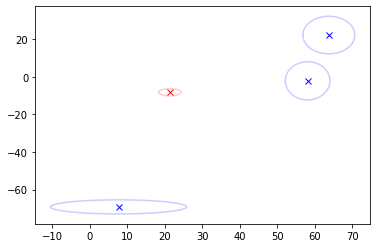

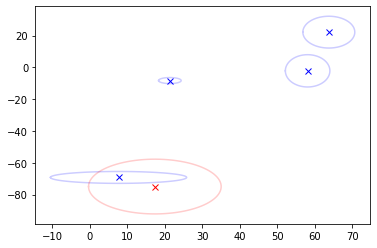

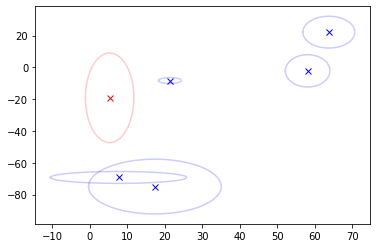

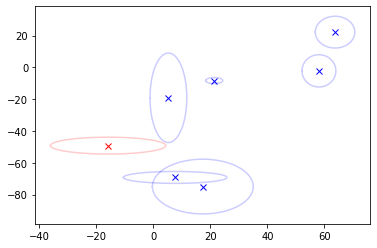

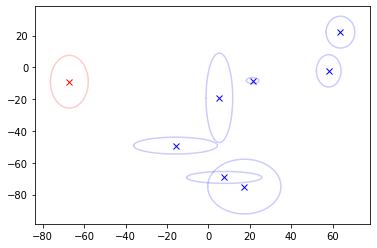

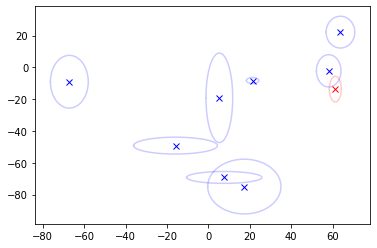

In [13]:
angles = np.linspace(-np.pi, np.pi, 100)

# Amount of epochs to iterate through
# Start low
EPOCH_MAX = 10

# These are for str
plt.clf()
for hi in range(0, EPOCH_MAX):
    for ep in range(0, hi):
        col = 'b'
        if ep == hi - 1:
            col = 'r'
        plt.plot(mean_str[ep][0], mean_str[ep][1], 'x'+col)
        plt.plot(
            mean_str[ep][0] + std_str[ep][0] * np.cos(angles),
            mean_str[ep][1] + std_str[ep][1] * np.sin(angles),
            col,
            alpha = 0.2
        )
    plt.show()

<Figure size 432x288 with 0 Axes>

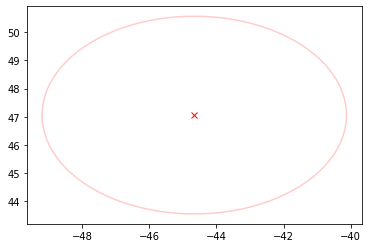

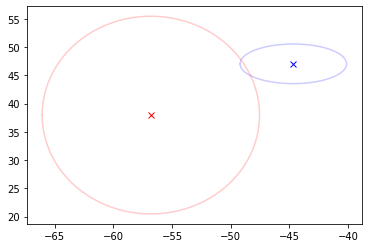

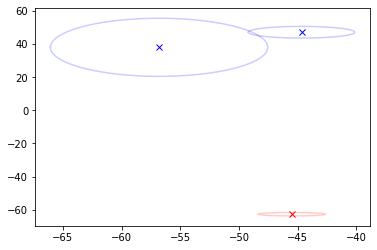

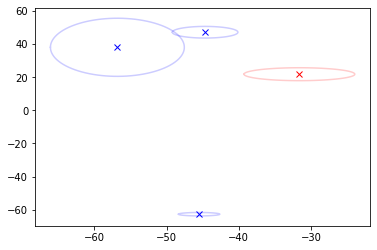

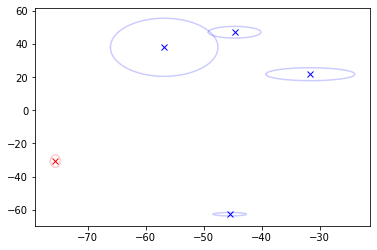

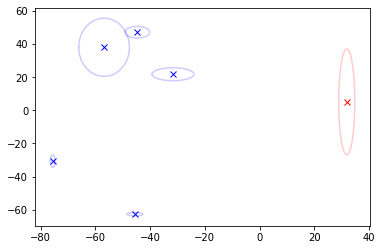

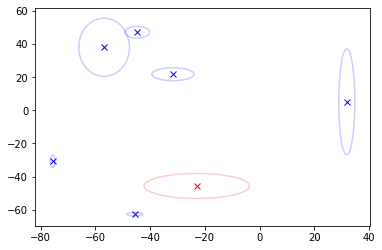

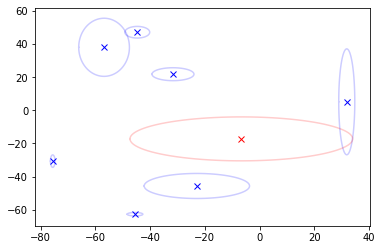

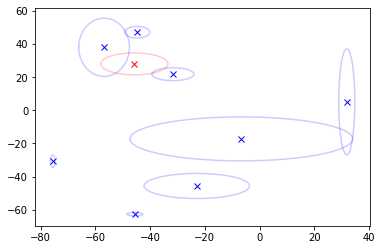

In [14]:
EPOCH_MAX = 10

# For GP
plt.clf()
for hi in range(0, EPOCH_MAX):
    for ep in range(0, hi):
        col = 'b'
        if ep == hi - 1:
            col = 'r'
        plt.plot(mean_gp[ep][0], mean_gp[ep][1], 'x'+col)
        plt.plot(
            mean_gp[ep][0] + std_gp[ep][0] * np.cos(angles),
            mean_gp[ep][1] + std_gp[ep][1] * np.sin(angles),
            col,
            alpha = 0.2
        )
    plt.show()

<Figure size 432x288 with 0 Axes>

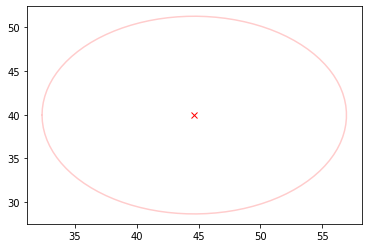

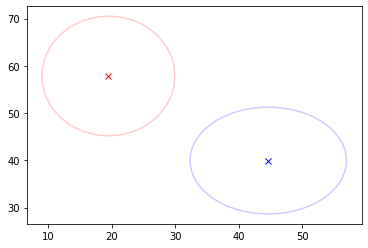

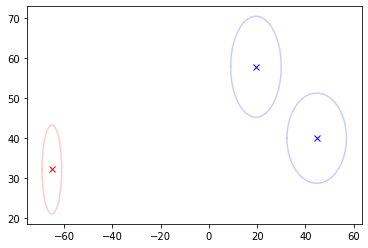

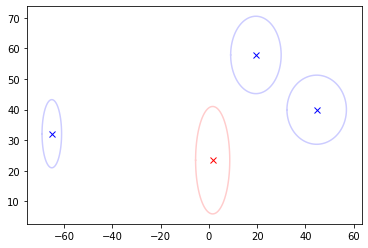

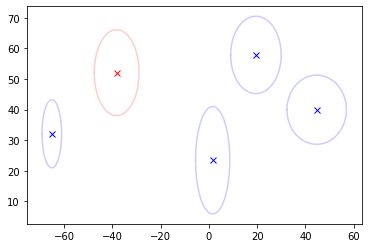

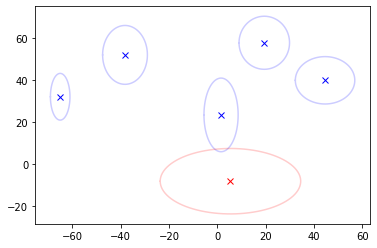

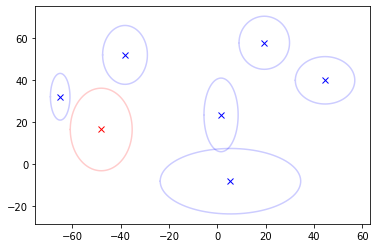

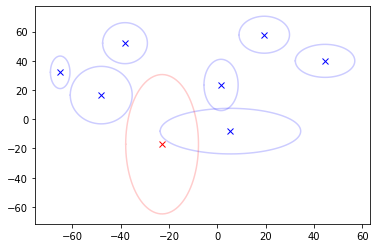

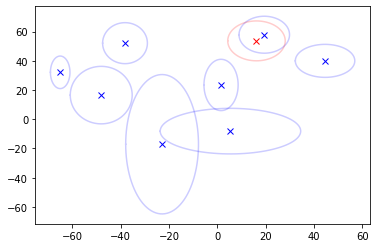

In [15]:
EPOCH_MAX = 10

# For all
plt.clf()
for hi in range(0, EPOCH_MAX):
    for ep in range(0, hi):
        col = 'b'
        if ep == hi - 1:
            col = 'r'
        plt.plot(mean_all[ep][0], mean_all[ep][1], 'x'+col)
        plt.plot(
            mean_all[ep][0] + std_all[ep][0] * np.cos(angles),
            mean_all[ep][1] + std_all[ep][1] * np.sin(angles),
            col,
            alpha = 0.2
        )
    plt.show()

<Figure size 432x288 with 0 Axes>

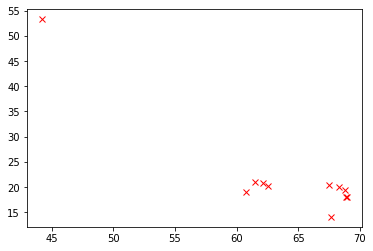

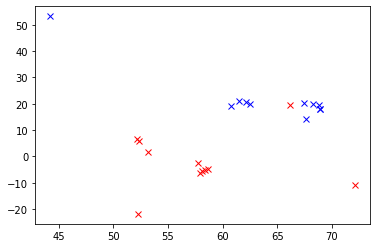

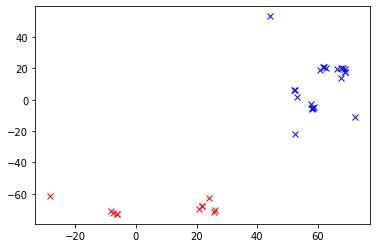

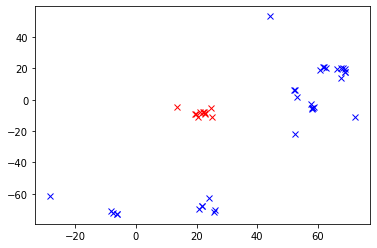

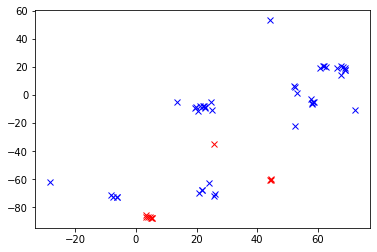

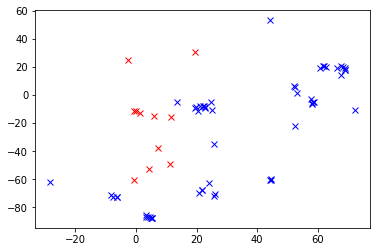

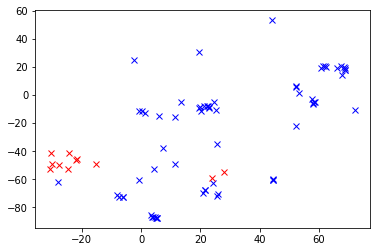

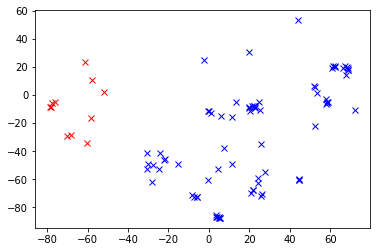

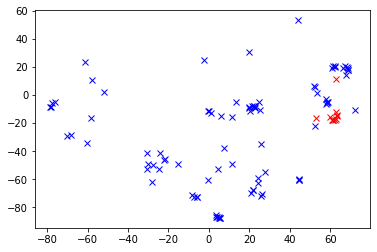

In [16]:
EPOCH_MAX = 10

# In this example, plot all TSNE-embedded feature vectors
# Per epoch ("over time") as before
# str
plt.clf()
for hi in range(0, EPOCH_MAX):
    for ep in range(0, hi):
        col = 'b'
        if ep == hi - 1:
            col = 'r'
        plt.plot(
            [x for x,_ in tsne_str[ : , ep]], 
            [y for _,y in tsne_str[ : , ep]], 
            'x'+col)
    plt.show()

#### Per channel type
Ordering (should) remain same in such a way that the following makes sense:

In [17]:
str_tmp = tsne_all[0:11]
gp_tmp  = tsne_all[11:26]

#### Above is not tested particularily extensively
11 channels str, 16 channels gp

Now plot simultaneously

What's different from before is that we're plotting TSNE embeddings generated from ALL feature vectors.
If synchronization is high, then str embeddings and gp embeddings should be close.
Old samples are shown with low alpha. Red for str, blue for gp.

<Figure size 432x288 with 0 Axes>

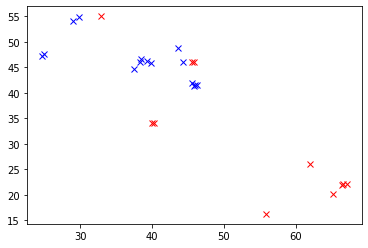

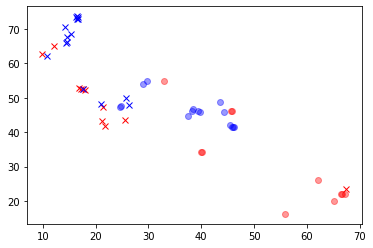

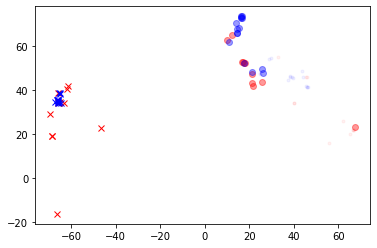

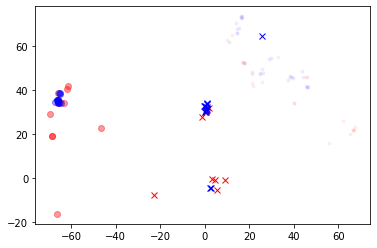

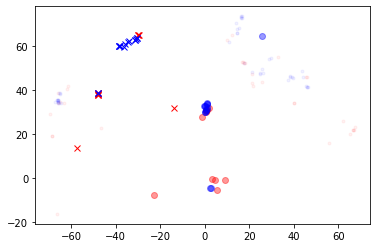

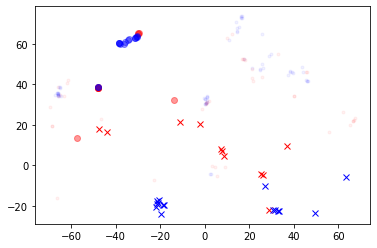

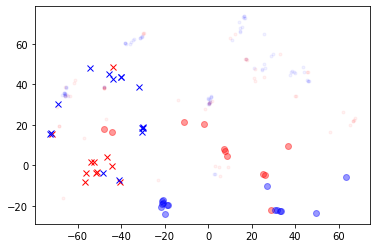

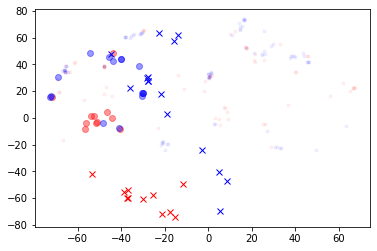

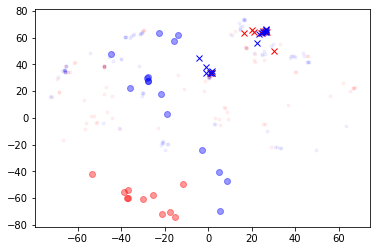

In [18]:
EPOCH_MAX = 10

plt.clf()
for hi in range(0, EPOCH_MAX):
    for ep in range(0, hi):
        
        alpha = 0.05
        shape = '.'
        if ep == hi - 1:
            alpha = 1
            shape = 'x'
        elif ep == hi - 2:
            shape = 'o'
            alpha = 0.4
            
        plt.plot(
            [x for x,_ in str_tmp[ : , ep]], 
            [y for _,y in str_tmp[ : , ep]], 
            'r' + shape,
            alpha=alpha
        )
        
        plt.plot(
            [x for x,_ in gp_tmp[ : , ep]], 
            [y for _,y in gp_tmp[ : , ep]], 
            'b' + shape,
            alpha=alpha
        )
    plt.show()

#### Results (my results, at least):
Very strong synchronization happens very rarely, but does happen. Identifying these particular epochs and researching more thoroughly with other methods could be beneficial.

Some quite weak synchronization over str/gp seems to be implied. All embeddings are generally in the same part of the plot. However, str and gp embeddings generally closer same class than other class.

#### Attempt at rasterizing TSNE output.

In [19]:
# Hard to understand but efficient function.
# Written in a "pythonic" (simpler) rather than "numpythonic" way, takes many many MANY times longer.
def rasterize(samples, side = 40):
    # Find range of values; input is N x 2 numpy array
    maxx1 = np.max(samples[ : , 0])
    minx1 = np.min(samples[ : , 0])
    maxx2 = np.max(samples[ : , 1])
    minx2 = np.min(samples[ : , 1])
    
    # Decides the "pixels"
    x1incr = (maxx1 - minx1) / side
    x2incr = (maxx2 - minx2) / side
    raster = np.zeros((side, side))
    
    # Count amount of samples belonging to each pixel
    for i in range(0, side):
        for j in range(0, side):
            # 
            #    Uses numpy boolean indexing
            #
            raster[i,j] += samples[
                (samples[ : , 0] >= minx1 + i * x1incr) & \
                (samples[ : , 0] < minx1 + (i + 1) * x1incr) & \
                (samples[ : , 1] >= minx2 + j * x2incr) & \
                (samples[ : , 1] < minx2 + (j + 1) * x2incr)
            ].flatten().shape[0]
            
    return raster

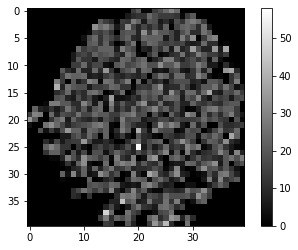

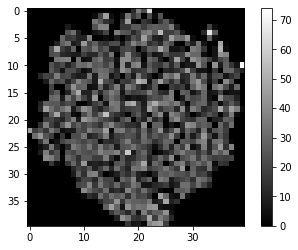

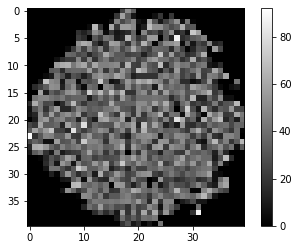

In [20]:
tsne_str = tsne_str.reshape((-1, 2))
tsne_gp  = tsne_gp.reshape((-1, 2))
tsne_all = tsne_all.reshape((-1, 2))

raster_str = rasterize(tsne_str)
plt.imshow(raster_str, cmap = 'gray', vmin = 0, vmax = np.max(raster_str))
plt.colorbar()
plt.show()

raster_gp = rasterize(tsne_gp)
plt.imshow(raster_gp, cmap = 'gray', vmin = 0, vmax = np.max(raster_gp))
plt.colorbar()
plt.show()

raster_all = rasterize(tsne_all)
plt.imshow(raster_all, cmap = 'gray', vmin = 0, vmax = np.max(raster_all))
plt.colorbar()
plt.show()